## Import packages required

In [15]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Data Visualisation

In [20]:
#Loading dataset
dataset = pd.read_csv('/kaggle/input/gdsc-nsut-recruitment-2023/train.csv')
test_dataset = pd.read_csv('/kaggle/input/gdsc-nsut-recruitment-2023/test.csv')

Text(0, 0.5, 'F_30')

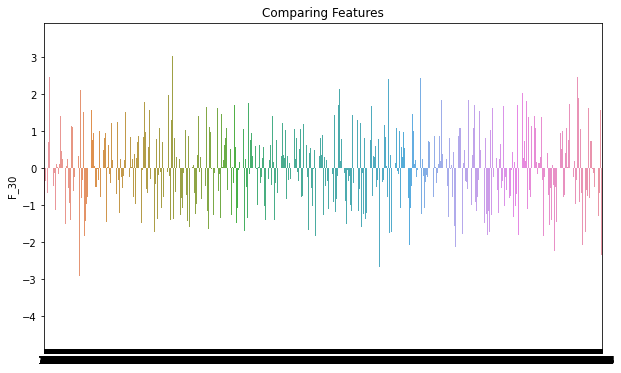

In [22]:
import seaborn as sns

# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Comparing Features")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=dataset.index, y=dataset['F_30'])

# Add label for vertical axis
plt.ylabel("F_30")

Text(0, 0.5, 'F_12')

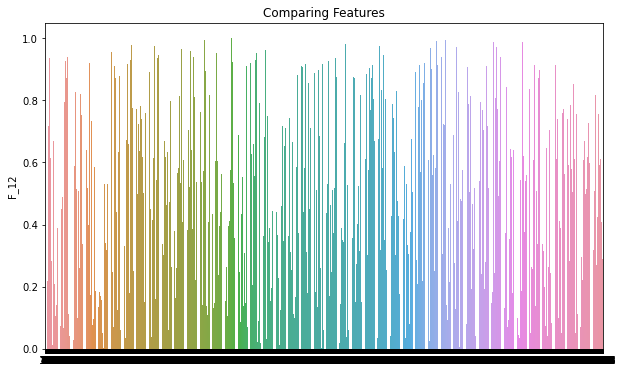

In [23]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Comparing Features")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=dataset.index, y=dataset['F_12'])

# Add label for vertical axis
plt.ylabel("F_12")

Text(0, 0.5, 'F_3')

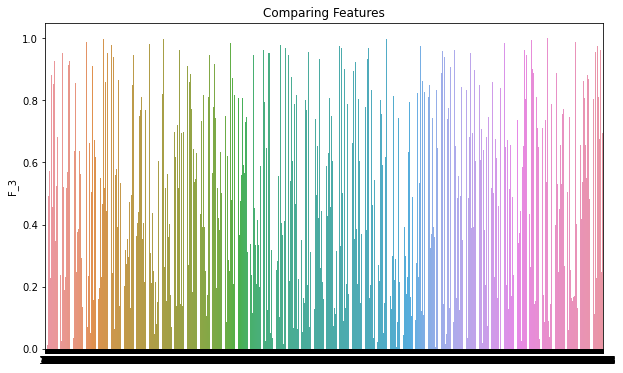

In [24]:
import seaborn as sns
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("Comparing Features")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=dataset.index, y=dataset['F_3'])

# Add label for vertical axis
plt.ylabel("F_3")

In [25]:
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [26]:
train_ID = dataset['id']
dataset.drop("id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(dataset.shape)) 


The train data size after dropping Id feature is : (10000, 41) 


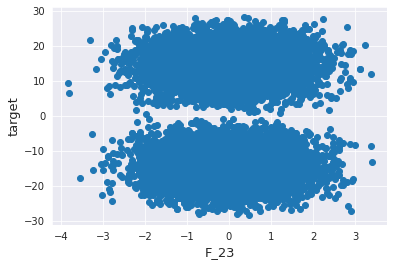

In [27]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['F_23'], y = dataset['target'])
plt.ylabel('target', fontsize=13)
plt.xlabel('F_23', fontsize=13)
plt.show()

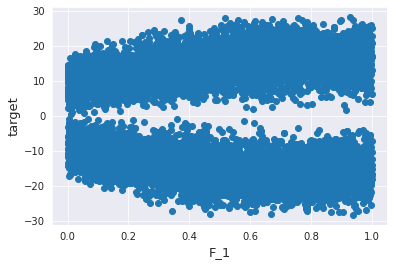

In [29]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['F_1'], y = dataset['target'])
plt.ylabel('target', fontsize=13)
plt.xlabel('F_1', fontsize=13)
plt.show()

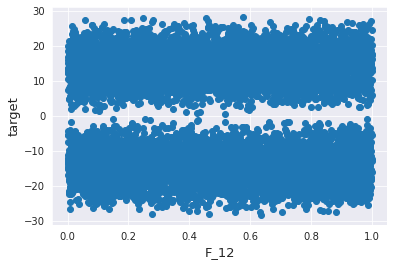

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = dataset['F_12'], y = dataset['target'])
plt.ylabel('target', fontsize=13)
plt.xlabel('F_12', fontsize=13)
plt.show()


 mu = 0.00 and sigma = 1.00



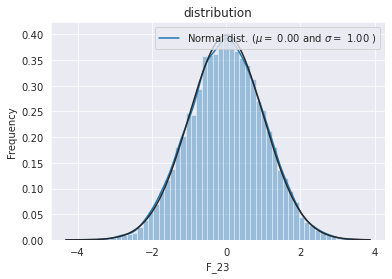

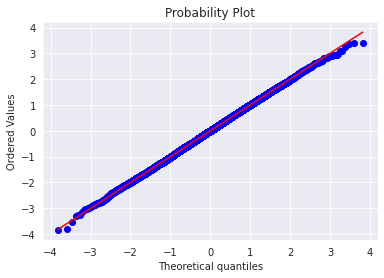

In [31]:
sns.distplot(dataset['F_23'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataset['F_23'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataset['F_23'], plot=plt)
plt.show()


 mu = -0.01 and sigma = 1.26



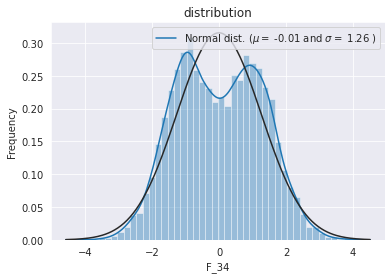

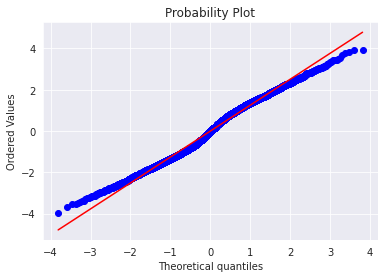

In [59]:
sns.distplot(dataset['F_34'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dataset['F_34'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(dataset['F_34'], plot=plt)
plt.show()

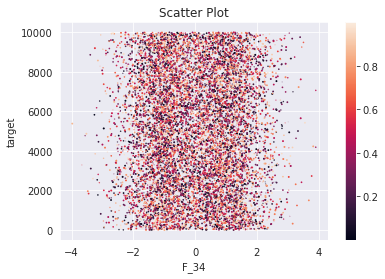

In [43]:
# Scatter plot with different features
plt.scatter(dataset['F_34'], dataset.index, c=dataset['F_3'],
            s=dataset['F_2'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('F_34')
plt.ylabel('target')
 
plt.colorbar()
 
plt.show()

/opt/conda/lib/python3.7/site-packages/matplotlib/collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


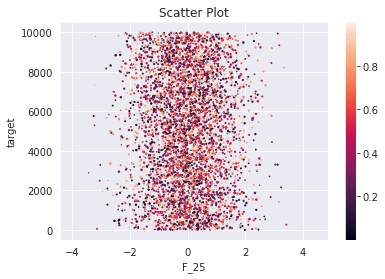

In [41]:
# Scatter plot with day against tip
plt.scatter(dataset['F_25'], dataset.index, c=dataset['F_3'],
            s=dataset['F_34'])
 
# Adding Title to the Plot
plt.title("Scatter Plot")
 
# Setting the X and Y labels
plt.xlabel('F_25')
plt.ylabel('target')
 
plt.colorbar()
 
plt.show()

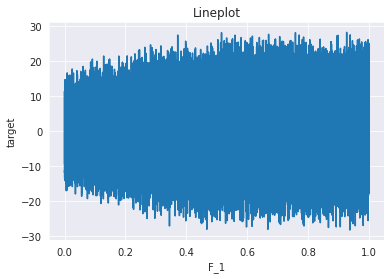

In [51]:
# draw lineplot
sns.lineplot(x="F_1", y="target", data=dataset)
 
# setting the title using Matplotlib
plt.title('Lineplot')
 
plt.show()

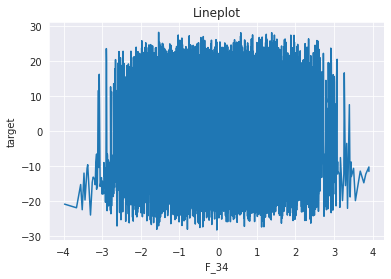

In [52]:
# draw lineplot
sns.lineplot(x="F_34", y="target", data=dataset)
 
# setting the title using Matplotlib
plt.title('Lineplot')
 
plt.show()

<AxesSubplot:>

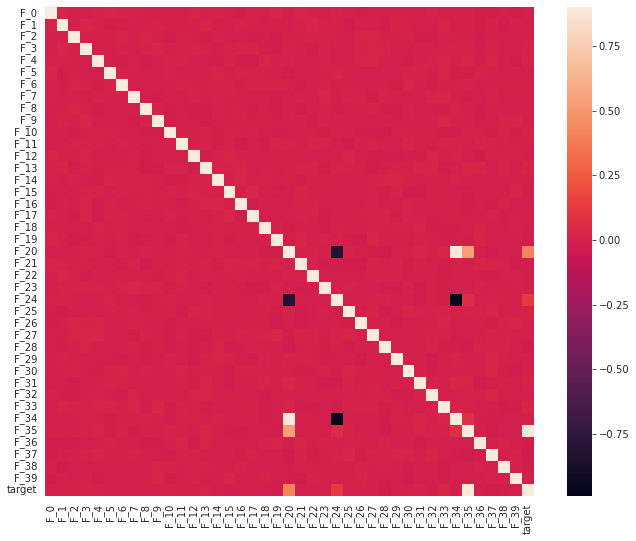

In [32]:
# Correlation map to see how features are correlated with SalePrice
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

## Load the training and testing files using pandas

In [16]:
train = pd.read_csv('/kaggle/input/gdsc-nsut-recruitment-2023/train.csv')
test = pd.read_csv('/kaggle/input/gdsc-nsut-recruitment-2023/test.csv')

In [4]:
n_folds = 5
weights = []
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
train_data = train.iloc[:, :-1]
train_target = train.iloc[:, -1]

estimator = lgb.LGBMRegressor()
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(train_data, train_target)
rfe_train_data = train_data.iloc[:, selector.support_]

for fold, (train_idx, val_idx) in enumerate(kf.split(train)):
    X_train, y_train = rfe_train_data.iloc[train_idx], train_target[train_idx]
    X_val, y_val = rfe_train_data.iloc[val_idx], train_target[val_idx]
    model = lgb.LGBMRegressor()
    model.fit(X_train, y_train)
    val_preds = model.predict(X_val)
    fold_rmse = mean_squared_error(y_val, val_preds, squared=False)
    print(f'Fold {fold+1} RMSE: {fold_rmse}')

Fold 1 RMSE: 2.9834235413260455
Fold 2 RMSE: 2.725826746549156
Fold 3 RMSE: 2.5986604701692735
Fold 4 RMSE: 2.5925667915260844
Fold 5 RMSE: 2.6726755920799032


In [17]:
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
import xgboost as xgb
n_folds = 4
weights = []
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
train_data = train.iloc[:, :-1]
train_target = train.iloc[:, -1]

estimator = lgb.LGBMRegressor()
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(train_data, train_target)
rfe_train_data = train_data.iloc[:, selector.support_]

test_data = test.iloc[:, selector.support_]
test_preds = np.zeros((test_data.shape[0],))

for fold, (train_idx, val_idx) in enumerate(kf.split(train)):
    X_train, y_train = rfe_train_data.iloc[train_idx], train_target[train_idx]
    X_val, y_val = rfe_train_data.iloc[val_idx], train_target[val_idx]

    model = lgb.LGBMRegressor(random_state=42)
    model.fit(X_train, y_train)

    val_preds = model.predict(X_val)
    fold_rmse = mean_squared_error(y_val, val_preds, squared=False)
    weights.append(1 / fold_rmse)
    print(f'Fold {fold+1} RMSE: {fold_rmse}')
    test_preds += model.predict(test_data) * weights[fold]

test_preds /= sum(weights)

print(test_preds)


Fold 1 RMSE: 3.0500727839023494
Fold 2 RMSE: 2.4791914803752864
Fold 3 RMSE: 2.758299122116199
Fold 4 RMSE: 2.6379805734469426
[ 12.50502629 -16.19176751  15.37782599 ... -23.97097432  22.22493428
 -10.14514442]


## submission

In [18]:
submission = pd.read_csv('/kaggle/input/gdsc-nsut-recruitment-2023/sample_submission.csv')
submission['target'] = test_preds
submission.to_csv('submission.csv', index = False)

In [19]:
submission.head()

,id,target
0,10000,12.505026
1,10001,-16.191768
2,10002,15.377826
3,10003,-7.207446
4,10004,-19.062572
